# ImgLib2: Introduction

[ImgLib2](http://imagej.net/ImgLib2) is a general-purpose, multidimensional image processing library.  Writing code using ImgLib2 is independent of image dimensionality, data type, and data storage strategy.  It's designed to be reusable, to decouple algorithm development and data management, and to be extensible and adaptable through the addition of new algorithms, pixel types, and storage strategies.

Find javadocs for Imglib2 [here](http://javadoc.imagej.net/ImgLib2/).

## Accessibles

In ImgLib2, images are represented by [_Accessibles_](http://imagej.net/ImgLib2_-_Accessibles). Image here refers to any (partial) function from coordinates to values.

In the following sections we will see how pixel values can be manipulated using [_Accessors_](http://imagej.net/ImgLib2_-_Accessors). _Accessors_ are obtained from _Accessibles_. 

_Accessibles_ represent the data itself. Pixel images, procedurally generated images, views into images (for instance sub-images), interpolated images, sparse collections of samples, the list of local intensity maxima of an image, list of nearest neighbors, etc., are all examples of _Accessibles_.

## Accessors

In ImgLib2, images are manipulated using [_Accessors_](http://imagej.net/ImgLib2_-_Accessors).  For pixel images, you can think of an accessor as a movable reference to a pixel.  It can be moved around the image, even to a pixel at specific coordinates.  It can be de-referenced to get the pixel value, and it can retrieve the current position.  The accessors provided by ImgLib2 typically implement [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) of  [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html).


>_NOTE:_    
>Both, [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) and [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) implement the [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html) interface which allows to access pixel values. Both implement the [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) interface which allows to retrieve the accessors current >pixel coordinates. Both inherit (through Localizable) the [EuclideanSpace](http://javadoc.imagej.net/ImgLib2/net/imglib2/EuclideanSpace.html) interval which allows to get the number of dimensions of the image.

>Note, that [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html), [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), and [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) have a type paramer **< T >** that refers to the value type of the underlying image.

### RandomAccess

[RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) provides n-dimensional random access through the [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) interface. It can be used to access pixels at arbitrary integer coordinates. 

The following code uses a RandomAccess to draw some white pixels into an image.

>_NOTE:_
> * **`get()`** is defined in the [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html) interface, so you can obtain pixel references from a Cursor in exactly the same way.
> * Often, the **`T`** obtained from **`Sampler < T >.get()`** is a proxy object that is re-used internally. You should assume that moving the accessor invalidates the proxy. If you want to keep a permanent reference to a pixel, use the **`Sampler < T >.copy()`** method. In the above example, this would return a copy of the RandomAccess refering to the same pixel.
> * The [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html), [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html), … interfaces are not restricted to accessors. In fact, many ImgLib2 entities are [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html). For instance, the [Point](http://javadoc.imagej.net/ImgLib2/net/imglib2/Point.html) class implements [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) and [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html), and simply represents a n-dimensional coordinate. In your own code, whenever you have something that can provide coordinates, you should consider implementing [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html).

First, we will create a 400x320 8-bit gray-level image.

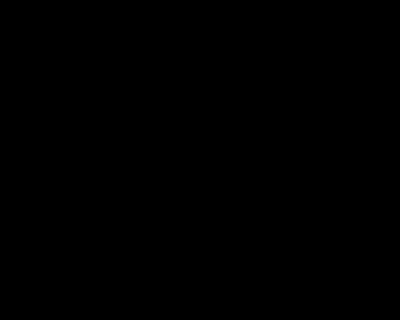

In [1]:
import net.imglib2.img.array.ArrayImgs

long[] dimensions = [400, 320]
img = ArrayImgs.unsignedBytes(dimensions)

Next, we will create a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) to the image. Img implements the [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html) interface, thus we can use randomAccess() to obtain one. The [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) has the same generic type, [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html), as the image.

In [2]:
r = img.randomAccess()
random = new Random()

java​.util​.Random​@3d133cdb

Using a **for** loop, we will set 1000 random pixels to the value of 255 (ie. _white_).  

First, we obtain the _x_, _y_ coordiantes of a random pixel within the image boundaries (_lines 2-3_). 

Then we position the [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) at those coordinates using **setPosition()** from the [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) interface, which takes two parameters, the coordinate and the dimension (_lines 4-5_), so we set the coordinate in dimension 0 to the value _x_, and we set the coordinate in dimension 1 to the value _y_.  

In _line 6_, using **get()**, we retrieve the pixel value at that coordinate; this method retunrs an instance of the pixel value type [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html) that acts as a reference to the pixel.  

Finally, we set the pixel value to 255 (ie. _white_) via this reference (_line 7_).

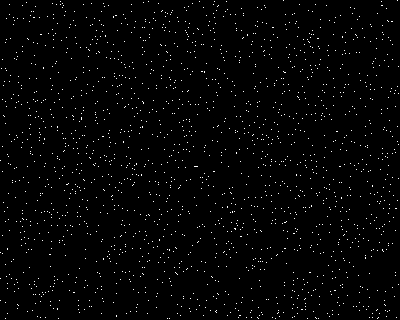

In [4]:
1000.times {
  x = ( int ) ( random.nextFloat() * img.max( 0 ) )
  y = ( int ) ( random.nextFloat() * img.max( 1 ) )
  r.setPosition( x, 0 )
  r.setPosition( y, 1 )
  t = r.get()
  t.set( 255 )
}
img

Before we move on to the "other" accessor, [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html), let's consider a generalization of the previous example. Let's say we like setting random pixels, and because we plan to do this a lot in the future, we extract this functionality into a method.

Easy enough. But what if we want to apply the method to images of another value type, e.g. **`DoubleType`** or **`ARGBType`**? What if we want to apply it to a 3D image? ImgLib2 allows you to write code that handles of this transparently. 

In the following example, we write a function that sets 1000 random pixels to "white" no matter what.

We are going to write a **`draw()`** method that can be applied to many ImgLib2 constructs that are not pixel  [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html)s. For instance there are Views that employ on-the-fly coordinate transforms, sampled and interpolated data, etc.

There is no need to restrict ourselves to [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html).  We need be able to get a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), so we need **`RandomAccessible< T >`**, and to get the number of dimensions and the extent in every dimension,  so we need [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html) and therefore use **`RandomAccessibleInterval< T >`**.

However, with great power comes great responsibility… Taking a general [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html) means that we no longer can assume that the interval starts at coordinates (0,0,…,0). Thus we need to make a final modification to correctly draw between min and max of the interval.

In [5]:
import java.util.Random
import net.imglib2.*
  
construct01 = new Object() {
  def <T> void draw( final RandomAccessibleInterval< T > img, final T value ) {
    // get the number of dimensions
    final int n = img.numDimensions()
    // Taking a general Interval means that we no longer can assume 
    // that the interval starts at coordinates (0,0,…,0). Thus we need 
    // to make a final modification to correctly draw between min and max of the interval.
    final long[] min = new long[ n ]
    img.min( min )
    final long[] scale = new long[ n ]
    for ( int d = 0; d < n; ++d ) {
      scale[ d ] = img.max( d ) - min[ d ]
    }
    final long[] pos = new long[ n ]

    // create a RandomAccess to the image (now the generic type, T)
    // Img implements the RandomAccessible interface, 
    // thus we can use randomAccess() to obtain one
    final RandomAccess< T > r = img.randomAccess()
    final Random random = new Random()
    for ( int i = 0; i < 1000; ++i ) {
      // loop over all dimensions when setting the position of the RandomAccess
      for ( int d = 0; d < n; ++d ) {
        pos[ d ] = min[ d ] + ( long ) ( random.nextFloat() * scale[ d ] )
      }
      // set the position
      r.setPosition( pos )

      // get() the pixel at that coordinate and 
      // set the pixel value via this reference
      r.get().set( value )
    }
  }  
}

Script5​$1​@6031d6e6

In this example, we use a 3D FloatType image.  We will call the **`draw()`** method and display the resulting image.    

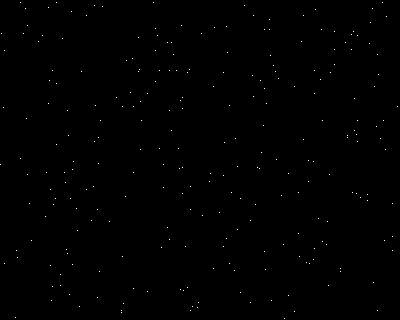

In [6]:
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.img.array.ArrayImgs

long[] dimensions = [400, 320, 5]
img = ArrayImgs.floats(dimensions)
construct01.draw( img, new FloatType(255f)) // call draw() method
img

>_NOTE:_
> * Besides **`setPosition()`** in a single or all dimensions, you can also relatively move a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) in one or all dimensions, or move the [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) pixel-wise in one dimension (Have a look at the [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) API doc!) Which of those is most efficient depends on the situation.
> **`T`** here is a **`setPosition()`** version which takes a [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html). Often a situation occurs where you want to position accessor _a_ to the same location as accessor _b._ In this situation you can avoid localizing _b_ into an array and using that array to set the position of _a._ You can simply **`a.setPosition( b )`** because _b_ is [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html).
> * By _image_, we do not necessarily mean _pixel image._
> * We use the generic parameter **`< T extends Type< T > >`** instead of **`< Type >`** throughout ImgLib2 since that allows us to be more type-safe. Imagine implementing an **`add(a, b)`** method for a certain type: using the simpler generic parameter would not allow us to enforce both parameters to have the same subclass of **`Type`**!
> * We create as many variables as possible outside of the loop (in particular, objects) since creating objects costs a bit of execution time and can easily dominate the performance of the algorithm if one is not careful about it.

### Cursor

[Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) provides iteration through the [Iterator](http://javadoc.imagej.net/ImgLib2/net/imglib2/Iterator.html) interface. It can be moved forward to visit all pixels of the image once.  The [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) concept is not limited to pixel images. A [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) can be used to iterate every collection of [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) samples.

[Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) provides iteration through the [net.imglib2.Iterator](http://javadoc.imagej.net/ImgLib2/net/imglib2/Iterator.html) interface. **`Iterator.fwd()`** advances the cursor. **`Iterator.hasNext()`** returns true if the cursor can be advanced further. Initially, a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) points before the first element. You have to call **`fwd()`** once to move to the first element.

Note, that the ImgLib2 [net.imglib2.Iterator](http://javadoc.imagej.net/ImgLib2/net/imglib2/Iterator.html) interface is different from Java's [java.util.Iterator](https://docs.oracle.com/javase/8/docs/api/java/util/Iterator.html). However, for convenience, [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) implements [java.util.Iterator](https://docs.oracle.com/javase/8/docs/api/java/util/Iterator.html) as well.

Just like [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) extends [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html), so you can **`get()`** the value of the current pixel (respectively sample). It also implements [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html), so you can query the coordinates of the current sample.

Let's look at an example: 

We load and display an image of diatoms.

[INFO] Populating metadata
[INFO] Populating metadata


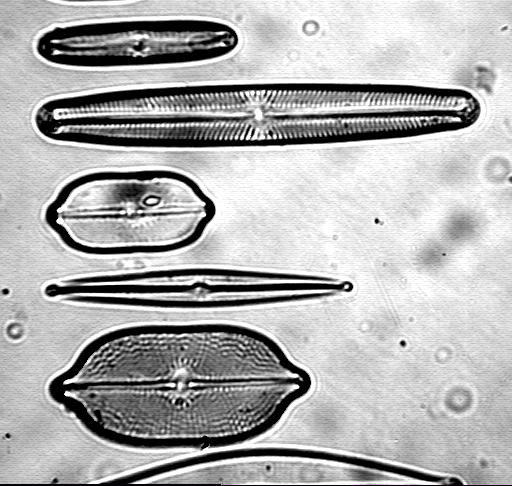

In [9]:
import io.scif.img.IO

// load an image of diatoms
path = "http://wsr.imagej.net/images/Diatoms.jpg"
diatoms = IO.open(path)

Then, we will find the maximum value (the intensity of the brightest pixel) within this image.

In [10]:
import net.imglib2.Cursor
import net.imglib2.img.Img

// we get a Cursor from the image
cursor = diatoms.cursor()
int max = 0

// we iterate over the image 
while ( cursor.hasNext() ) {
  // get the value at the current position
  t = cursor.next()
  // check that if greater than max; if so, set to max
  max = Math.max( t.get(), max )
}
"maximum = " + max

maximum = 255

Let's extend the previous example. Now we are also interested in the coordinates of the maximum. [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) extends the [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) interface which provides methods to get the current location either dimension-by-dimension or all at once.  And let's do this via a generic version; for example, we will not take an **`Img< T >`** as the parameter, because that would be too restrictive.  All we need is something that is iterable. Because we can easily put interval bounds on every iterable set of Localizables, ImgLib2 does not define an Iterable super-interface for IterableInterval. So [IterableInterval< T >](http://jenkins.imagej.net/job/ImgLib-daily/javadoc/index.html?net/imglib2/IterableInterval.html) is the most general we can go here.

So here is our more general method for finding the maximum pixel value in the image:

In [11]:
import net.imglib2.*
 
construct02 = new Object() {
    // IterableInterval<T> is the most general type to use, but must be Comparable
    // the return value of findmax is a Cursor<T>, holds value and coordinates
    public static < T extends Comparable<T>> Cursor< T > findmax( final IterableInterval< T > iterable ) {
        final Cursor< T > cursor = iterable.cursor()
        cursor.fwd()
        Cursor< T > max = cursor.copyCursor()
      while ( cursor.hasNext() ) {
        // to remember the maximum, we simply take a new copy 
        // of the iterating cursor whenever a better max value is found
        if ( cursor.next().compareTo( max.get() ) > 0 ) {
                max = cursor.copyCursor()
        }
      }
        return max
    }
 }

Script11​$1​@755777d5

For finding the maximum, the only restriction we have to put on type T is that it is comparable.

The return value of **`findmax()`** is a **`Cursor<T>`**. Instead of creating a new class that represents a tuple of maximum value and coordinates, we simply return a **`Cursor`** positioned at the maximum.

We will now call this method on the diatoms image, and will use the dimension-by-dimension **`getLongPosition()`** of the [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) interface.

In [14]:
// use findmax and get the maximum value and coordinates from the resulting Cursor,
// using the dimension-by-dimension getLongPosition() of the Localizable interface
max = construct02.findmax( diatoms )
"max = " + max.get().get() + " found at (" + max.getLongPosition( 0 ) + ", " + max.getLongPosition( 1 ) + ")"

max = 255 found at (50, 0)

> _NOTE:_
> * The iteration order is subject to implementation, specialized for each memory layout to minimize access time. For example, an [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) has a different iteration order from a [CellImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/cell/CellImg.html). This is nicely illustrated in [ImgLib2 Example 2b - Duplicating an Img using a different ImgFactory](http://imagej.net/ImgLib2_Examples#Example_2b_-_Duplicating_an_Img_using_a_different_ImgFactory).
> * Typically, there are two variants of [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) available. One that calculates its location per each iteration and one that calculates it only per localization request. The former is more efficient when localization occurs frequently, the latter otherwise. In the maximum-finding example, we use the latter because localization is only required once after the maximum has been found. The former one could be obtained using **`localizingCursor()`** instead of **`cursor()`** (see [IterableInterval](http://jenkins.imagej.net/job/ImgLib-daily/javadoc/index.html?net/imglib2/IterableInterval.html) API doc)
> * **`copyCursor()`** is a work-around to circumvent a javac bug with covariant return type overriding. In the future (with JDK7) every [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html) can be copied using **`copy()`** instead of having specialised **`copyCursor()`**, **`copyRandomAccess()`**, … methods.

ImgLib2 is not restricted to rasterized images and integer coordinates. It also supports continuous images and real-valued coordinates. Examples where this is appropriate are

* an interpolated image, where an interpolated value can be obtained at any real coordinate. Note that this is a bounded, but continuous image. Thus it is not iterable.
* a procedurally generated image, where a value can be computed at any real coordinate (continuous, unbounded, non-iterable).
* collections of samples taken at arbitrary real coordinates (discrete, bounded, iterable).

Real equivalents of the [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) and [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) interfaces have been added by which real-valued coordinates can be accessed, [RealPositionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealPositionable.html) and [RealLocalizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealLocalizable.html), respectively.   [RealPositionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealPositionable.html) extends [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html), because whenever something can be positioned at arbitrary real coordinates, of course it can be positioned to integer coordinates as well.  [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) extends [RealLocalizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealLocalizable.html), as something that is able to provide its integer coordinates is always able to provide them as real coordinates too.

Both, [RealRandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccess.html) and [RealCursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealCursor.html) are [RealLocalizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealLocalizable.html). Note that the inheritance relationship of [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) and [RealLocalizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealLocalizable.html) propagates to the cursors. Every [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) is also a [RealCursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealCursor.html) (because it can provide its current integer coordinates as real coordinates as well). There is no such relationship between [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) and [RealRandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccess.html).

You can read more about this final topic and see example code [here](http://imagej.net/ImgLib2_-_Accessors#Accessors_for_Continuous_Coordinates).